In [1]:
from cmath import cos
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import nltk
import re
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Patch 
import seaborn as sns

In [2]:
#Q1: Find linear regression coefficents for the indicator variables for species identity against the
#four-dimensional X. Plot the decision boundaries between the classes implied by the regres-
#sion coefficients on top of the scatter plot.
penguins_train=pd.read_csv( "penguins_train.csv")
penguins_test = pd.read_csv( "penguins_test.csv")
penguins = penguins_train
penguins["SP1"] = penguins.Species == "Adelie"
penguins["SP2"] = penguins.Species == "Gentoo"
penguins["SP3"] = penguins.Species == "Chinstrap"
penguins_test["SP1"]= penguins.Species == "Adelie"
penguins_test["SP2"]= penguins.Species == "Gentoo"
penguins_test["SP3"]= penguins.Species == "Chinstrap"
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].to_numpy()
penguinclean = penguins[np.isfinite( penguins["Beak Depth (mm)"]) & 
                        np.isfinite( penguins["Body Mass (g)"]) &
                        np.isfinite( penguins["Flipper Length (mm)"]) & 
                        np.isfinite( penguins["Beak Length (mm)"])]
penguins_train = penguins_train[np.isfinite( penguins_train["Beak Depth (mm)"]) & 
                        np.isfinite( penguins_train["Body Mass (g)"]) &
                        np.isfinite( penguins_train["Flipper Length (mm)"]) & 
                        np.isfinite( penguins_train["Beak Length (mm)"])]
penguins_test = penguins_test[np.isfinite( penguins_test["Beak Depth (mm)"]) & 
                            np.isfinite( penguins_test["Body Mass (g)"]) &
                            np.isfinite( penguins_test["Flipper Length (mm)"]) & 
                            np.isfinite( penguins_test["Beak Length (mm)"])]
reg4_1 = LinearRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP1.values)
reg4_2 = LinearRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP2.values)
reg4_3 = LinearRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP3.values)

In [3]:
def penguinspredict2(x, c1, i1, c2, i2, c3, i3):
    SP1PREDICTION = np.dot( x,c1) + i1
    SP2PREDICTION = np.dot( x,c2) + i2
    SP3PREDICTION = np.dot( x,c3) + i3
    
    if SP1PREDICTION >= SP2PREDICTION and SP1PREDICTION >= SP3PREDICTION:
        species = 1
    elif SP2PREDICTION >= SP1PREDICTION and SP2PREDICTION >= SP3PREDICTION:
        species = 2
    else:
        species = 3
    return species

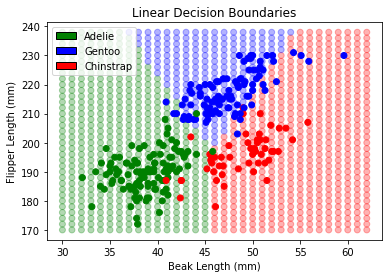

In [6]:
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap" : "red"}
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()
xgrid = np.arange(170, 240,2) # range for flipper length
ygrid = np.arange(30,63,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
        z[i,j]= penguinspredict2(x, reg4_1.coef_, reg4_1.intercept_, reg4_2.coef_, reg4_2.intercept_, reg4_3.coef_, reg4_3.intercept_)
colorsnum = { 1 : "green", 2: "blue", 3: "red"}  
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)
plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")
plt.title('Linear Decision Boundaries')
plt.show()

In [7]:
#Q2: Find logistic regression coefficents for the indicator variables for species identity against
#the four-dimensional X. Plot the decision boundaries between the classes implied by the
#regression coefficients on top of the scatter plot.
reg4_1 = LogisticRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP1.values) 
reg4_2 = LogisticRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP2.values)
reg4_3 = LogisticRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP3.values)


In [8]:
def penguinspredict3(x, c1, i1, c2, i2, c3, i3):
    SP1PREDICTION = np.dot( x,np.transpose(c1)) + i1
    SP2PREDICTION = np.dot( x,np.transpose(c2)) + i2
    SP3PREDICTION = np.dot( x,np.transpose(c3)) + i3
    
    if SP1PREDICTION >= SP2PREDICTION and SP1PREDICTION >= SP3PREDICTION:
        species = 1
    elif SP2PREDICTION >= SP1PREDICTION and SP2PREDICTION >= SP3PREDICTION:
        species = 2
    else:
        species = 3
    return species

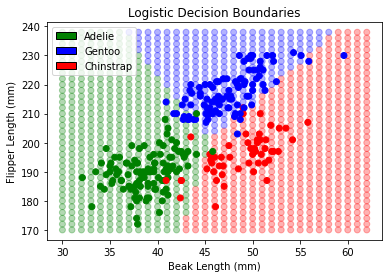

In [9]:
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
        z[i,j]= penguinspredict3(x, reg4_1.coef_, reg4_1.intercept_, reg4_2.coef_, reg4_2.intercept_, reg4_3.coef_, reg4_3.intercept_)
colorsnum = { 1 : "green", 2: "blue", 3: "red"}  
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)
plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")
plt.title("Logistic Decision Boundaries")
plt.show()

In [10]:
#Q4: Find the class-conditional multivariate normal densities in four dimensions for each of the
#three penguin species using the training subset. Plot the (quadratic) decision boundaries
#between penguin species on the scatter plot of flipper length vs. beak depth.
sp1 = penguins_train.loc[penguins_train['SP1']==True]
sp1_means = np.array([sp1["Beak Depth (mm)"].mean(), sp1["Body Mass (g)"].mean(), sp1["Beak Length (mm)"].mean(), sp1["Flipper Length (mm)"].mean()])
sp2 = penguins_train.loc[penguins_train['SP2']==True]
sp2_means = np.array([sp2["Beak Depth (mm)"].mean(), sp2["Body Mass (g)"].mean(), sp2["Beak Length (mm)"].mean(), sp2["Flipper Length (mm)"].mean()])
sp3 = penguins_train.loc[penguins_train['SP3']==True]
sp3_means = np.array([sp3["Beak Depth (mm)"].mean(), sp3["Body Mass (g)"].mean(), sp3["Beak Length (mm)"].mean(), sp3["Flipper Length (mm)"].mean().mean()])
sp1_cov = np.cov(sp1[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].to_numpy().T)
sp2_cov = np.cov(sp2[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].to_numpy().T)
sp3_cov = np.cov(sp3[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].to_numpy().T)

In [12]:
def penguinsclassify(x, m1, c1, m2, c2, m3, c3):
    p1 = scipy.stats.multivariate_normal.pdf(np.transpose(x), mean=m1, cov=c1)
    p2 = scipy.stats.multivariate_normal.pdf(np.transpose(x), mean=m2, cov=c2)
    p3 = scipy.stats.multivariate_normal.pdf(np.transpose(x), mean=m3, cov=c3)
    if p1 > p2 and p1 >p3:
        species = 1
    elif p2 > p3 and p2 > p1:
        species = 2
    else:
        species = 3
    return species

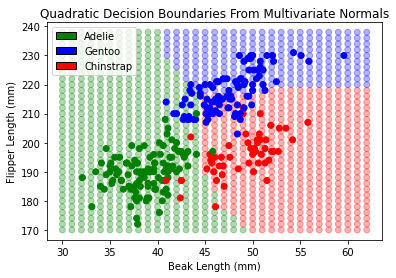

In [13]:
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
        z[i,j]= penguinsclassify(x, sp1_means, sp1_cov, sp2_means, sp2_cov, sp3_means, sp3_cov)
colorsnum = { 1 : "green", 2: "blue", 3: "red"}  
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)
plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")
plt.title("Quadratic Decision Boundaries From Multivariate Normals")
plt.show()

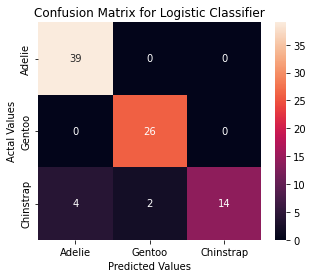

In [17]:
#Q5: Classify the test set by species and report the confusion matrix for one of the three classifi-
#cation methods above. 

#Choosing to make the confusion matrix for the logistic regression
reg4_1 = LogisticRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP1.values) 
reg4_2 = LogisticRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP2.values)
reg4_3 = LogisticRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values, penguins_train.SP3.values)
    
pred = []
real = []
for i , r in penguins_test.iterrows():
    x = r[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]]
    pred.append(penguinspredict3(x, reg4_1.coef_, reg4_1.intercept_, reg4_2.coef_, reg4_2.intercept_, reg4_3.coef_, reg4_3.intercept_))
    if r['SP1']:
        real.append(1)
    elif r['SP2']:
        real.append(2)
    else:
        real.append(3)

cm = confusion_matrix(real, pred)
cm_df = pd.DataFrame(cm, index = ['Adelie','Gentoo','Chinstrap'], columns = ['Adelie','Gentoo','Chinstrap'])
    
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix for Logistic Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [18]:
#Q6: Score the messages
spam =pd.read_csv("spam.csv", encoding="latin-1")
spamclean = []
for line in open("spam.csv", encoding="latin-1"):
    a = line.find(",")
    spamclean.append((line[0:a], line[a+1:]))
spam = pd.DataFrame(spamclean)
spam = spam.drop(labels=0, axis=0)
spam =spam.rename({0: "label", 1:"text"}, axis=1)
s1 = spam.query("label == 'ham'")
s2 = spam.query("label == 'spam'")
s1text = s1.text.str.cat()
s2text = s2.text.str.cat()
tok1 = nltk.word_tokenize(s1text)
tok2 = nltk.word_tokenize(s2text)
d1 = nltk.FreqDist(tok1)
d2 = nltk.FreqDist(tok2)

In [23]:
def score(text, d1, d2):
    text_clean = re.sub(r'[^\w\s]', '', text)
    text_list = text_clean.split()
    score = 1
    for word in text_list:
        if word in d1 and word in d2:
            if d1[word]+d2[word]>5:
                prob = (d2[word]/d2.N())/(d1[word]/d1.N())
                score = score * prob
        elif word in d1 and word not in d2:
            if d1[word]>5:
                prob = .05
                score = score * prob
        else:
            if d2[word]>5:
                prob = 20
                score = score * prob
    return score

In [20]:
score1 = score("Hey there, I am Maya with GP Research. We’re surveying IL residents. Can you respond to a few questions?", d1, d2)
score2 = score("Headed down now.", d1, d2)
score3 = score("The banana chocolate bread is delicious! All that’s left is one small heel, which I will dunk in my coffee tomorrow.", d1, d2)
score4 = score("Hurry! For a limited time, add a FREE line to your account. Really, it’s on us{no strings attached.", d1, d2)
print(score1)
print(score2)
print(score3)
print(score4)

0.00013990334157202894
0.2009543202555983
3.9696818833263596e-09
62.145964405591236


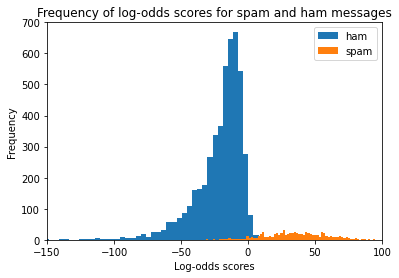

In [25]:
#Q7: Plot the histogram of log-odds-scores for all the messages in the training set.
log_scores = []
for i in spam.index:
    text = spam['text'][i]
    label = spam['label'][i]
    score_n = score(text, d1, d2)
    log_scores.append((math.log2(score_n), label))
spam = [i[0] for i in log_scores if i[1]=='spam']
ham = [j[0] for j in log_scores if j[1]=='ham']
plt.hist(ham, 75, label='ham')
plt.hist(spam, 75, label='spam')
plt.xlim(-150, 100)
plt.ylim(0,700)
plt.xlabel('Log-odds scores')
plt.ylabel('Frequency')
plt.title("Frequency of log-odds scores for spam and ham messages")
plt.legend()
plt.show()
